<a href="https://colab.research.google.com/github/Nandhni03/Satellite_segmentation_DeepLearning/blob/main/Satellite_Imagery_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART ONE: https://www.youtube.com/watch?v=3Xn21RT-y7Y&t=846s&sttick=0

In [ ]:
!pip install patchify

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
!ls -lah '/content/drive/MyDrive/Projects/Satellite Imagery DL/Datasets/DubaiDataset/Semantic-segmentation-dataset-1/Semantic segmentation dataset/'

total 33K
-rw------- 1 root root  548 Dec 29 15:40  classes.json
drwx------ 2 root root 4.0K Dec 29 15:41 'Tile 1'
drwx------ 2 root root 4.0K Dec 29 15:41 'Tile 2'
drwx------ 2 root root 4.0K Dec 29 15:41 'Tile 3'
drwx------ 2 root root 4.0K Dec 29 15:41 'Tile 4'
drwx------ 2 root root 4.0K Dec 29 15:41 'Tile 5'
drwx------ 2 root root 4.0K Dec 29 15:41 'Tile 6'
drwx------ 2 root root 4.0K Dec 29 15:41 'Tile 7'
drwx------ 2 root root 4.0K Dec 29 15:41 'Tile 8'


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Projects/Satellite Imagery DL/Datasets/DubaiDataset/Semantic-segmentation-dataset-1/'

In [ ]:
dataset_name = 'Semantic segmentation dataset'

In [ ]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1] #'/'
  #print(dir_name)

  if dir_name == 'masks':  # images
    images = os.listdir(path)
    #print(images)

    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')):  # .jpg
        #print(image_name)
        a = True

In [ ]:
image_patch_size = 256

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg', 1) # you can get any image, but right now they have different forms, so we need to normalize them

In [ ]:
image.shape

(644, 797, 3)

In [ ]:
mask = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.png', 1)

In [ ]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

NameError: name 'image' is not defined

In [ ]:
len(image_patches)

2

In [ ]:
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [ ]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

NameError: name 'image_patches' is not defined

In [ ]:
image_y[0].shape

(256, 256, 3)

In [ ]:
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
type(Image.fromarray(image))

PIL.Image.Image

array([[[201, 195, 190],
        [225, 219, 214],
        [241, 232, 228],
        ...,
        [255, 236, 231],
        [254, 234, 229],
        [255, 239, 234]],

       [[226, 220, 215],
        [254, 248, 243],
        [255, 255, 251],
        ...,
        [252, 231, 229],
        [247, 228, 223],
        [242, 223, 218]],

       [[248, 241, 238],
        [255, 252, 249],
        [255, 255, 251],
        ...,
        [253, 234, 231],
        [252, 235, 232],
        [245, 228, 225]],

       ...,

       [[211, 200, 203],
        [220, 209, 212],
        [221, 211, 217],
        ...,
        [220, 229, 242],
        [234, 243, 255],
        [235, 244, 255]],

       [[209, 198, 201],
        [219, 208, 211],
        [220, 210, 216],
        ...,
        [213, 222, 235],
        [222, 231, 244],
        [218, 227, 240]],

       [[213, 202, 205],
        [210, 199, 202],
        [201, 191, 197],
        ...,
        [223, 232, 245],
        [233, 242, 255],
        [230, 239, 252]]], dtype=uint8)
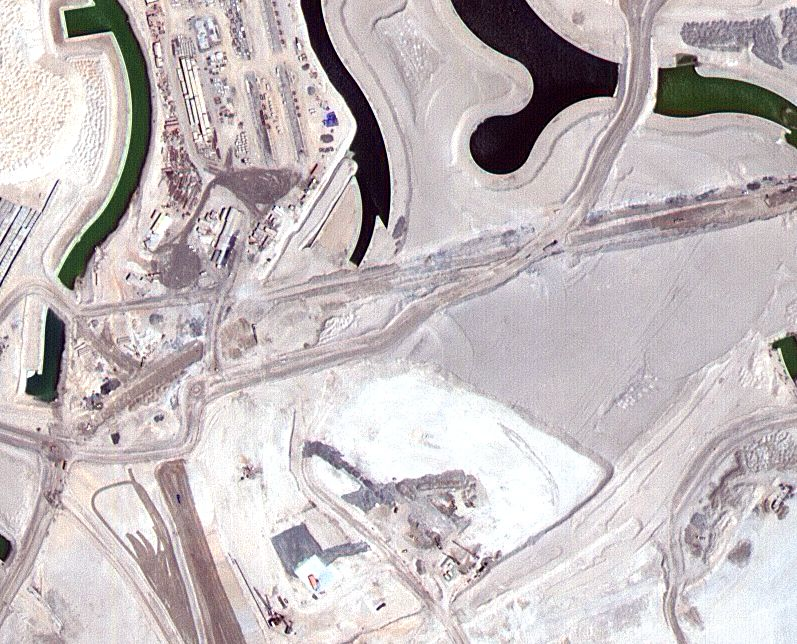

In [ ]:
image

In [ ]:
image.shape # 644-y 797-x

(644, 797, 3)

In [ ]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [ ]:
image_dataset = []

# for images

image_extension = 'jpg'
for tile_id in range(1, 8):
  for image_id in range(0, 20):
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extension}', 1)

    if image is not None:
      # print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      image = image[0:size_y, 0:size_x]
      # print(image.shape)
      image = Image.fromarray(first_image)
      image = image.crop((0, 0, size_x, size_y))
      # print("({}, {})".format(image.size[0], image.size[1]))
      image = np.array(image)
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #print(len(patched_images))

      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          single_patch_image = patched_images[i, j, :, :]
          #print(single_patch_image.shape)
          single_patch_image = minmaxscaler.fit_transform(single_patch_image.reshape(-1, single_patch_image.shape[-1])).reshape(single_patch_image.shape)
          single_patch_image = single_patch_image[0].shape
          #print(single_patch_image.shape)
          image_dataset.append(single_patch_image)

NameError: name 'first_image' is not defined

In [ ]:
len(image_dataset)

945

In [ ]:
mask_dataset = []

# for masks

image_extension = 'png'
for tile_id in range(1, 8):
  for image_id in range(0, 20):
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/masks/image_part_00{image_id}.{image_extension}', 1)

    if image is not None:

      #make sure its in the order RGB not BGR
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      image = image[0:size_y, 0:size_x]
      # print(image.shape)
      image = Image.fromarray(first_image)
      image = image.crop((0, 0, size_x, size_y))
      # print("({}, {})".format(image.size[0], image.size[1]))
      image = np.array(image)
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #print(len(patched_images))

      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          single_patch_mask = patched_images[i, j, :, :]
          #print(single_patch_mask.shape)
          single_patch_mask = single_patch_mask[0]
          mask_dataset.append(single_patch_mask)

In [ ]:
len(mask_dataset)

945

In [ ]:
# images and masks

image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'
  for tile_id in range(1, 8):
    for image_id in range(0, 20):
      if image_type == 'images':
        image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extension}', 1)
      elif image_type == 'masks':
        image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/masks/image_part_00{image_id}.{image_extension}', 1)

      if image is not None:
        if image_type == 'masks':
          #make sure its in the order RGB not BGR
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("({}, {})".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0, 0, size_x, size_y))
        #print("({}, {})".format(image.size[0], image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))

        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              single_patched_image = patched_images[i, j, :, :]
              #print(single_patched_image.shape)
              single_patched_image = minmaxscaler.fit_transform(single_patched_image.reshape(-1, single_patched_image.shape[-1])).reshape(single_patched_image.shape)
              single_patched_image = single_patched_image[0]
              #print(single_patched_image.shape)
              image_dataset.append(single_patched_image)
            elif image_type == 'masks':
              single_patched_mask = patched_images[i, j, :, :]
              #print(single_patch_mask.shape)
              single_patched_mask = single_patched_mask[0]
              mask_dataset.append(single_patched_mask)



In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [ ]:
image_dataset[0]

array([[[[0.78823529, 0.76470588, 0.74509804],
         [0.88235294, 0.85882353, 0.83921569],
         [0.94509804, 0.90980392, 0.89411765],
         ...,
         [0.89411765, 0.85882353, 0.82352941],
         [0.85882353, 0.83137255, 0.79607843],
         [0.87843137, 0.85098039, 0.81568627]],

        [[0.88627451, 0.8627451 , 0.84313725],
         [0.99607843, 0.97254902, 0.95294118],
         [1.        , 1.        , 0.98431373],
         ...,
         [0.93333333, 0.89803922, 0.8627451 ],
         [0.92941176, 0.90196078, 0.86666667],
         [0.95294118, 0.91764706, 0.88235294]],

        [[0.97254902, 0.94509804, 0.93333333],
         [1.        , 0.98823529, 0.97647059],
         [1.        , 1.        , 0.98431373],
         ...,
         [0.93333333, 0.89411765, 0.86666667],
         [0.92156863, 0.89411765, 0.85882353],
         [0.90196078, 0.86666667, 0.83137255]],

        ...,

        [[0.88235294, 0.8627451 , 0.86666667],
         [0.81960784, 0.80392157, 0.8       ]

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]], dtype=uint8)
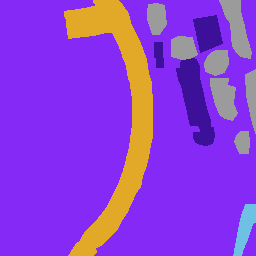

In [ ]:
mask_dataset[0]

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [ ]:
image_dataset[0].shape

(256, 256, 3)

In [ ]:
type(image_dataset[0])

numpy.ndarray

In [ ]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

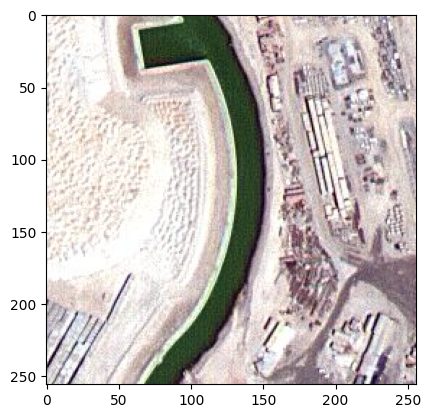

In [ ]:
plt.imshow(image_dataset[0])

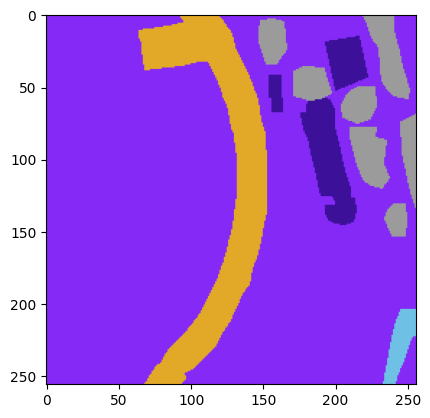

In [ ]:
plt.imshow(mask_dataset[0])

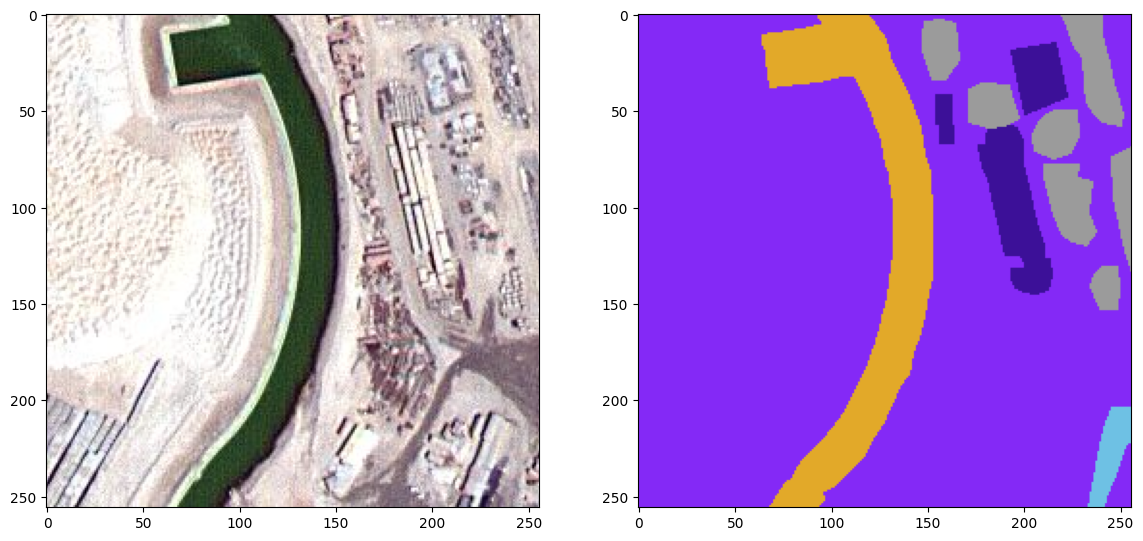

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[0])
plt.subplot(122)
plt.imshow(mask_dataset[0])

817


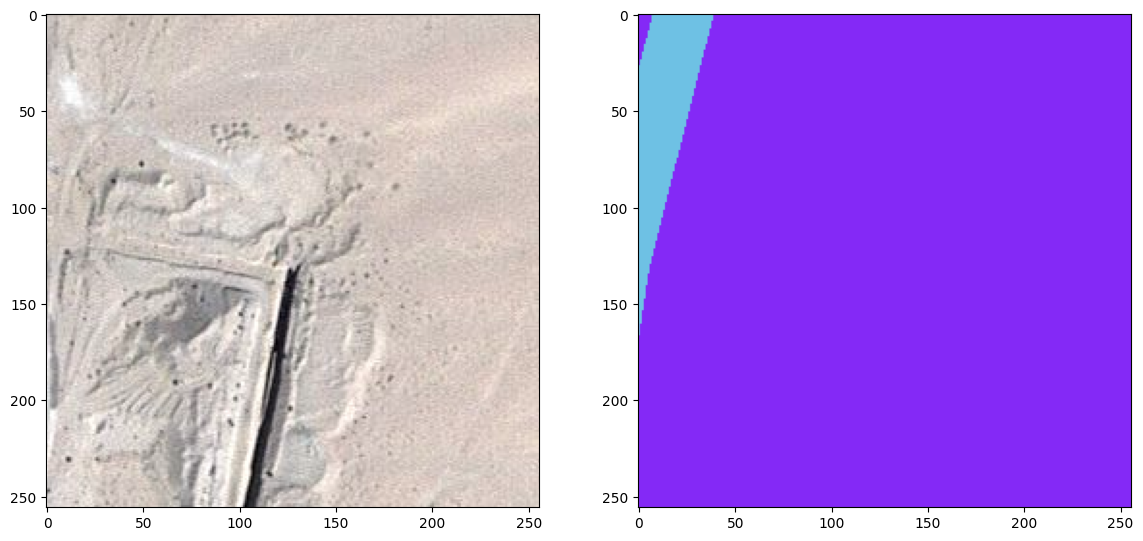

In [ ]:
random_image_id = random.randint(0, len(image_dataset))
print(random_image_id)

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

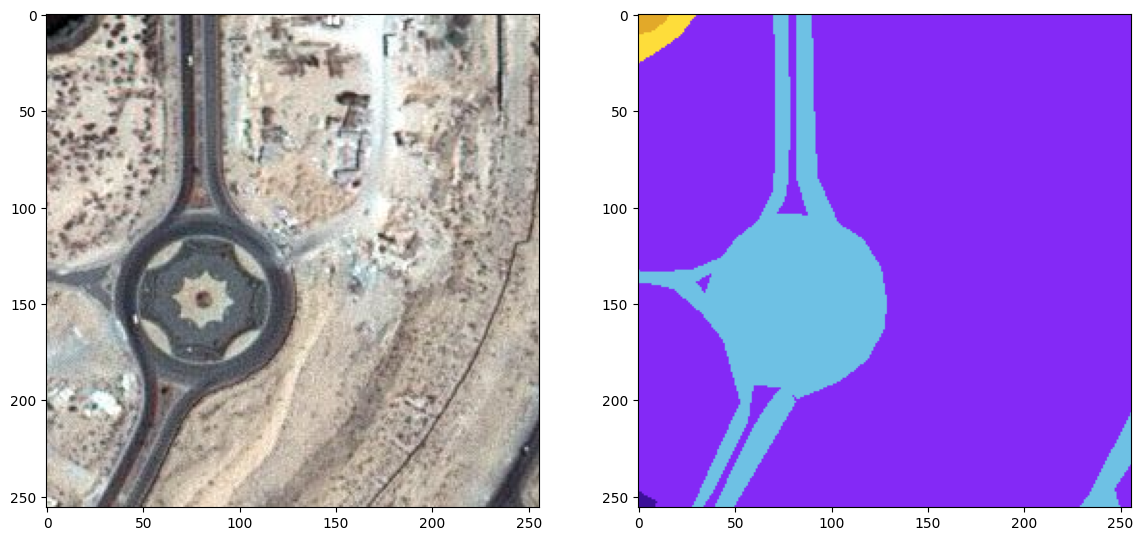

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[70])
plt.subplot(122)
plt.imshow(mask_dataset[70])

In [ ]:
class_builiding = '#3C1098'
class_building = class_builiding.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [ ]:
mask_dataset.shape[0]

945

In [ ]:
label = single_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5

  #print(label_segment.shape)
  label_segment = label_segment[:, :, 0]
  #print(label_segment.shape)
  return label_segment

In [ ]:
labels = []

for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [ ]:
print(len(labels))

945


In [ ]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
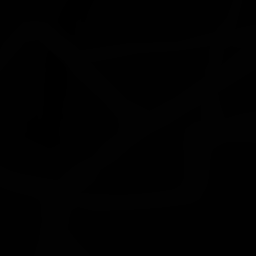

In [ ]:
labels[3]

In [ ]:
labels = np.expand_dims(labels, axis=3)

In [ ]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
print("total unique labels based on masks: ", format(np.unique(labels)))

total unique labels based on masks:  [0 1 2 3 4 5]


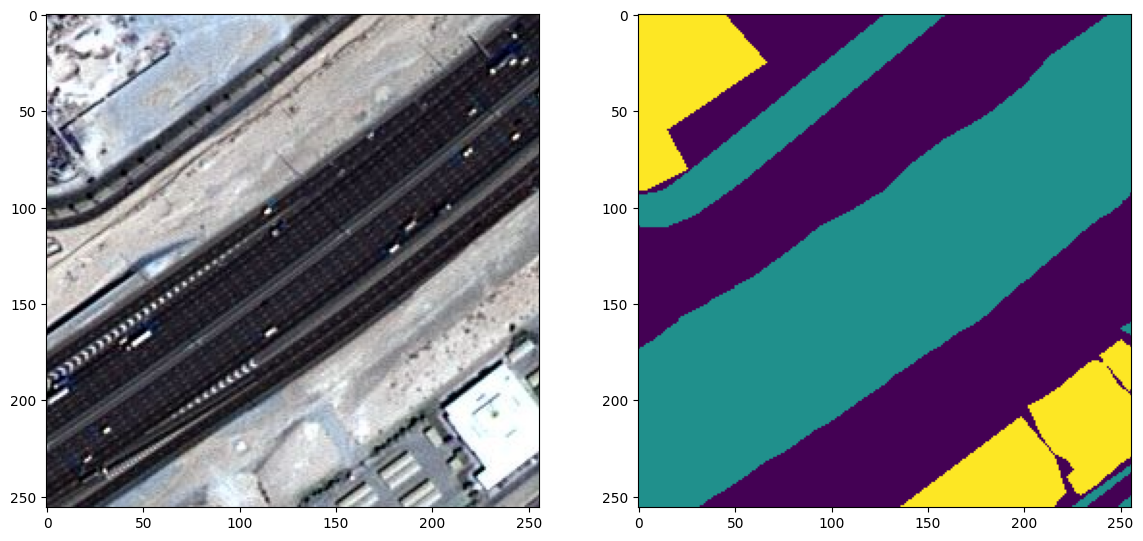

In [ ]:
random_image_id = random.randint(0, len(image_dataset))
#print(random_image)

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
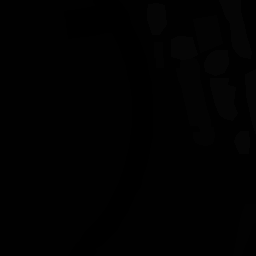

In [ ]:
labels[0][:,:,0]

In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
total_classes

6

In [ ]:

from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
labels_categorical_dataset

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [ ]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [ ]:
master_training_dataset = image_dataset

In [ ]:
master_training_dataset.shape

(945, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 256, 256, 3)
(189, 256, 256, 3)
(756, 256, 256, 6)
(189, 256, 256, 6)


In [ ]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


PART TWO: https://www.youtube.com/watch?v=UBzMgr6yfpw

U-Net Article: https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/

In [ ]:
!pip install -U segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
from keras import backend as K

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.layers import concatenate, BatchNormalization, Dropout, Lambda

Evvaluation Metrics:
Jaccard Index / Intersection over Union (IoU) (= overlap divided by the union -> over 90% results are very good)

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = intersection + 1.0 / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1) #designed for biomedical images, i can experiment with the .2 value
  c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2, 2))(c1)

  c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2, 2))(c2)

  c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2, 2))(c3)

  c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2, 2))(c4)

  c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.3)(c5)
  c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)
  model = Model(inputs=[source_input], outputs=[outputs])

  return model


In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)


In [ ]:
model = get_deep_learning_model()

In [ ]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

Loss Function: Focal Loss (Cross Entropy Loss Extension)

equal class weights -> dice loss -> focal loss -> total loss -> dice loss+(1*focal loss)

https://arxiv.org/abs/1708.02002 (paper)

In [ ]:
weights = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]

In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras

In [ ]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

Model Compilation

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

https://netron.app/

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
pip install pydot

In [ ]:
!apt-get install graphviz -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [ ]:
!pip install graphviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
plot_model(model, to_file='satellite_model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
import keras
from IPython.display import clear_output

%matplotlib inline

In [ ]:
import tensorflow

class PlotLoss(tensorflow.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []
    self.jaccard_coef = []
    self.val_jaccard_coef = []
    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    # self.jaccard_coef.append(logs.get('jaccard_coef'))
    # self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    clear_output(wait=True)

    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")

    # plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    # plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

    plt.legend()
    plt.show();

plot_loss = PlotLoss()

extended plot loss

In [ ]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()

model with callback

<Figure size 1400x800 with 0 Axes>

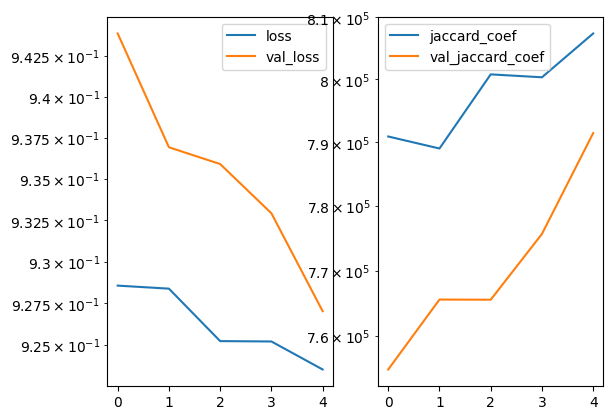

48/48 [==============================] - 459s 10s/step - loss: 0.9235 - accuracy: 0.8273 - jaccard_coef: 807388.5625 - val_loss: 0.9270 - val_accuracy: 0.8131 - val_jaccard_coef: 791462.7500
Epoch 6/10
10/48 [=====>........................] - ETA: 5:48 - loss: 0.9239 - accuracy: 0.8221 - jaccard_coef: 813997.6250

KeyboardInterrupt: 

In [84]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          epochs=10,
                          verbose=1,
                          validation_data=(x_test, y_test),
                          callbacks=[plot_loss],
                          shuffle=False)

original model => saved

In [ ]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          epochs=10,
                          verbose=1,
                          validation_data=(x_test, y_test),
                          shuffle=False)

Epoch 1/10
48/48 [==============================] - 487s 10s/step - loss: 0.9964 - accuracy: 0.5964 - jaccard_coef: 465759.2812 - val_loss: 0.9902 - val_accuracy: 0.6581 - val_jaccard_coef: 556254.8125
Epoch 2/10
48/48 [==============================] - 469s 10s/step - loss: 0.9669 - accuracy: 0.7010 - jaccard_coef: 630510.7500 - val_loss: 0.9672 - val_accuracy: 0.6988 - val_jaccard_coef: 597346.5625
Epoch 3/10
48/48 [==============================] - 462s 10s/step - loss: 0.9572 - accuracy: 0.7399 - jaccard_coef: 663544.1250 - val_loss: 0.9653 - val_accuracy: 0.7000 - val_jaccard_coef: 609326.5625
Epoch 4/10
48/48 [==============================] - 460s 10s/step - loss: 0.9513 - accuracy: 0.7564 - jaccard_coef: 688516.7500 - val_loss: 0.9559 - val_accuracy: 0.7343 - val_jaccard_coef: 674421.9375
Epoch 5/10
48/48 [==============================] - 462s 10s/step - loss: 0.9509 - accuracy: 0.7546 - jaccard_coef: 691186.6250 - val_loss: 0.9620 - val_accuracy: 0.7205 - val_jaccard_coef: 65

In [ ]:
history_a = model_history

In [ ]:
history_a.history

{'loss': [0.9963905215263367,
  0.9668950438499451,
  0.9572368860244751,
  0.9513447880744934,
  0.9509289264678955,
  0.9461672902107239,
  0.9453609585762024,
  0.9418307542800903,
  0.9403314590454102,
  0.9344211220741272],
 'accuracy': [0.5963925123214722,
  0.7009607553482056,
  0.7398689985275269,
  0.7564098238945007,
  0.7545987367630005,
  0.7673041820526123,
  0.7708810567855835,
  0.7796369194984436,
  0.7838585376739502,
  0.7996694445610046],
 'jaccard_coef': [465759.28125,
  630510.75,
  663544.125,
  688516.75,
  691186.625,
  710080.0,
  713296.9375,
  727138.5625,
  736991.3125,
  765730.0625],
 'val_loss': [0.9902324080467224,
  0.9672048091888428,
  0.9653456807136536,
  0.9559037685394287,
  0.9619810581207275,
  0.963799774646759,
  0.9554743766784668,
  0.9598546028137207,
  0.9423971772193909,
  0.9482266306877136],
 'val_accuracy': [0.658099353313446,
  0.6987839937210083,
  0.7000294923782349,
  0.7343210577964783,
  0.7204778790473938,
  0.7205891013145447,


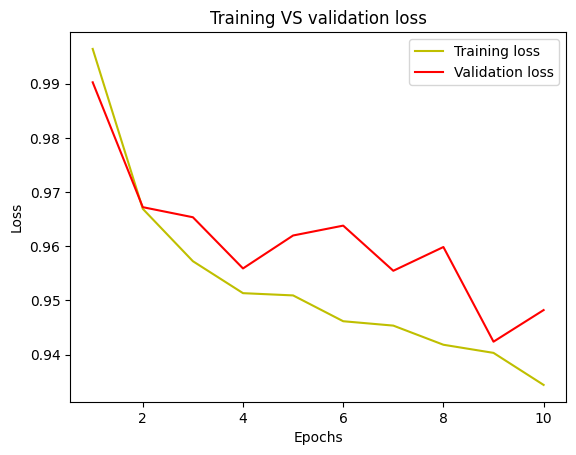

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training VS validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss

[0.9963905215263367,
 0.9668950438499451,
 0.9572368860244751,
 0.9513447880744934,
 0.9509289264678955,
 0.9461672902107239,
 0.9453609585762024,
 0.9418307542800903,
 0.9403314590454102,
 0.9344211220741272]

In [ ]:
val_loss

[0.9902324080467224,
 0.9672048091888428,
 0.9653456807136536,
 0.9559037685394287,
 0.9619810581207275,
 0.963799774646759,
 0.9554743766784668,
 0.9598546028137207,
 0.9423971772193909,
 0.9482266306877136]

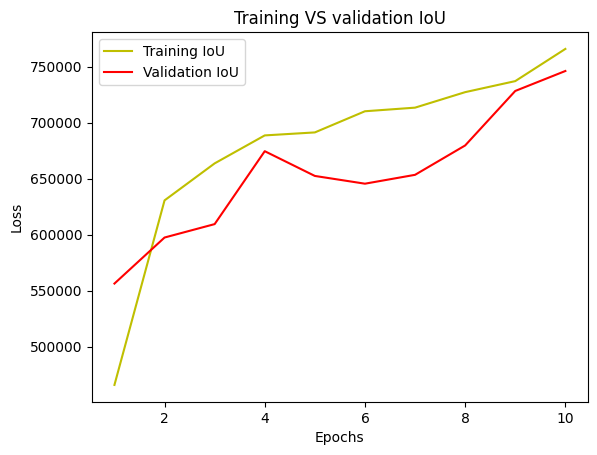

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label='Training IoU')
plt.plot(epochs, val_jaccard_coef, 'r', label='Validation IoU')
plt.title('Training VS validation IoU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 48}

In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 18s 3s/step


In [ ]:
len(y_pred)

189

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
len(y_pred_argmax)

189

In [ ]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [4, 1, 1, ..., 1, 1, 1],
        [4, 4, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        ...,
        [4, 4, 4, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)

In [ ]:
y_test_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [2, 1, 1, ..., 

Comparing prediction results

-using test images using mask images and predicted result images..

In [ ]:
import random

In [ ]:

test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0, :, :]

1/1 [==============================] - 0s 129ms/step


visualize one by one

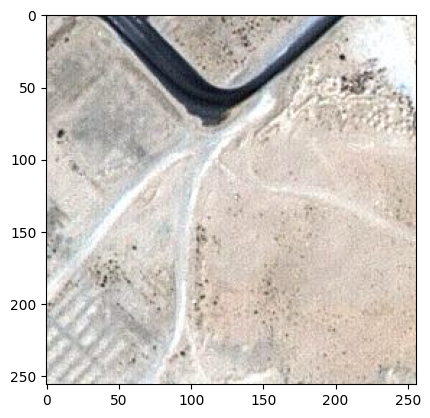

In [ ]:
plt.imshow(test_image)

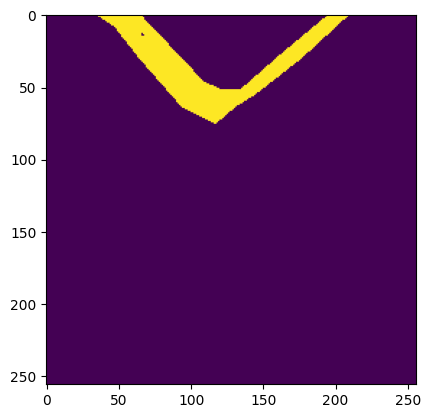

In [ ]:
plt.imshow(ground_truth_image)

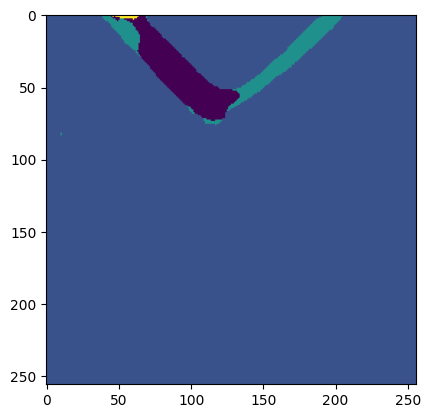

In [ ]:
plt.imshow(predicted_image)

All side by side

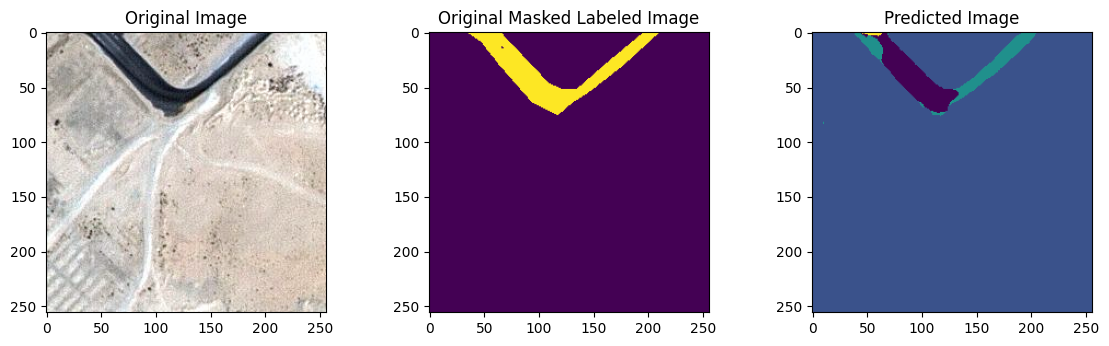

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(test_image)
plt.subplot(232)
plt.title('Original Masked Labeled Image')
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title('Predicted Image')
plt.imshow(predicted_image)
plt.show()

Save and Export the Model to Disk

in the content/under drive and sample_data

In [ ]:
model.save("satellite_segmentation_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Jan 11 17:21 .
drwxr-xr-x 1 root root 4.0K Jan 11 15:42 ..
drwxr-xr-x 4 root root 4.0K Jan  9 14:19 .config
drwx------ 7 root root 4.0K Jan 11 16:01 drive
drwxr-xr-x 1 root root 4.0K Jan  9 14:19 sample_data
-rw-r--r-- 1 root root  23M Jan 11 17:21 satellite_segmentation_model.h5


In [ ]:
import os
tpu_address = os.getenv('COLAB_TPU_ADDR')
if tpu_address:
    print("TPU is available!")
else:
    print("TPU is not available.")


TPU is not available.


PART THREE (LAST): https://www.youtube.com/watch?v=i40ulpcacFM

Model Export & Production

In [85]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.8 MB/s eta 0:00:00


In [86]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [87]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: nandhni-singh03 (nandhni-singh03-west-university-of-timi-oara). Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [88]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="satellite_Segmentation_dubai_images",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

link callback in the wandb.ai so you can do remote debugging

In [92]:
!pip install --upgrade wandb

In [94]:
!pip install wandb -qqq
!pip install --upgrade wandb[tensorflow] -qqq
from wandb.keras import WandbCallback # changed import statement to wandb.keras

In [96]:
wandb.init(
    # set the wandb project where this run will be logged
    project="satellite_Segmentation_dubai_images",
)

In [ ]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          epochs=10,
                          verbose=1,
                          validation_data=(x_test, y_test),
                          callbacks=[WandbCallback()],
                          shuffle=False)

wandb: WARNING WandbCallback is deprecated and will be removed in a future release. Please use the WandbMetricsLogger, WandbModelCheckpoint, and WandbEvalCallback callbacks instead. See https://docs.wandb.ai/guides/integrations/keras for more information.
wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
48/48 [==============================] - ETA: 0s - loss: 0.9228 - accuracy: 0.8291 - jaccard_coef: 810404.2500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20250111_191612-8vb4ygop/files/model-best)... Done. 0.1s


48/48 [==============================] - 471s 10s/step - loss: 0.9228 - accuracy: 0.8291 - jaccard_coef: 810404.2500 - val_loss: 0.9367 - val_accuracy: 0.7833 - val_jaccard_coef: 764825.3125
Epoch 2/10
48/48 [==============================] - ETA: 0s - loss: 0.9205 - accuracy: 0.8361 - jaccard_coef: 817864.2500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20250111_191612-8vb4ygop/files/model-best)... Done. 0.1s


48/48 [==============================] - 468s 10s/step - loss: 0.9205 - accuracy: 0.8361 - jaccard_coef: 817864.2500 - val_loss: 0.9265 - val_accuracy: 0.8119 - val_jaccard_coef: 791551.6875
Epoch 3/10
48/48 [==============================] - 462s 10s/step - loss: 0.9202 - accuracy: 0.8371 - jaccard_coef: 818366.0625 - val_loss: 0.9276 - val_accuracy: 0.8082 - val_jaccard_coef: 789773.1875
Epoch 4/10
27/48 [===============>..............] - ETA: 3:14 - loss: 0.9173 - accuracy: 0.8453 - jaccard_coef: 840738.5625